# t-SNE

xyfJASON

> 参考资料：
> https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
> https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding



## 1 理论

t-SNE (t-Distributed Stochastic Neighbor Embedding) 是一个无监督、非线性的降维方法，主要用于**数据可视化**，因而常常是降维到 2 维或 3 维。它和 PCA 的区别在于：后者是线性的，所以对于非线性流形结构的数据，用 PCA 来可视化效果并不好。

t-SNE 算法分别在高维空间和低维空间中计算数据点的两两相似度，然后用一个代价函数优化这两个相似度。其具体步骤如下：

1. 在高维空间中计算数据点的相似度：对于每一个数据点 $x_i$ 来说，以它为中心建立一个高斯分布，则其他数据点 $x_j$ 就有一个概率 $p_{j|i}$，于是这些概率与它们和 $x_i$ 的相似度正相关。具体而言：

   $$
   p_{j|i}=\frac{\exp(-||x_i-x_j||^2/2\sigma_i^2)}{\sum_{k\neq i}\exp(-||x_i-x_k||^2/2\sigma_i^2)}
   $$

   其中 $\sigma$ 的取值由困惑度（perplexity）决定，困惑度一般取值 $[5, 50]$。现在定义：
   
   $$
   p_{ij}=p_{ji}=\frac{p_{j|i}+p_{i|j}}{2N}
   $$

2. 类似于前一步，只不过用自由度为 1 的 $t$ 分布，也即柯西分布，代替高斯分布，在低维空间中建立概率 $q_{ij}$。具体而言：

   $$
   q_{ij}=\frac{(1+||y_i-y_j||^2)^{-1}}{\sum_{k}\sum_{k\neq l}(1+||y_k-y_l||^2)^{-1}}
   $$


3. 最后一步我们想让 $q_{ij}$ 尽可能好地反映 $p_{ij}$，我们用 KL 散度来表示这两个概率分布的距离，并用梯度下降法优化之：

   $$
   \text{Cost}=KL(P||Q)=\sum_{i\neq j} p_{ij}\log\frac{p_{ij}}{q_{ij}}
   $$


t-SNE 缺点是：

1. 复杂度高，运行时间长，占用内存大
2. 代价函数并不是凸的，有可能得到局部最优解，需要多次随机化初始点

## 2 代码

使用 `sklearn.manifold.TSNE` 类。

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

## 3 实例

用 t-SNE 对 MNIST 数据集进行可视化。

首先读取数据：

In [1]:
import pandas as pd

data = pd.read_csv('./data/MNIST_Kaggle.csv')
X = data.values
X, y = X[:5000, 1:], X[:5000, 0]

data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)
X_embedded

array([[-65.076454 ,  24.103369 ],
       [  2.6119192, -84.11744  ],
       [-24.560528 ,  33.248074 ],
       ...,
       [  0.6179106,  19.451761 ],
       [ 12.6843195,  64.12639  ],
       [ 18.954916 ,  41.788754 ]], dtype=float32)

将降维后的数据可视化如下：

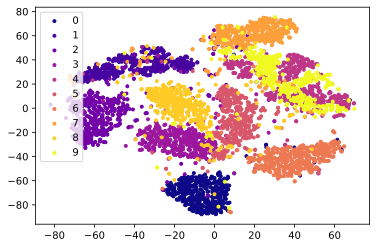

In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(1, 1)
cmap = plt.get_cmap('plasma', 10)
for i in range(10):
    mask = y == i
    ax.scatter(X_embedded[mask, 0], X_embedded[mask, 1], marker='.', color=cmap(i), label=f'{i}')
plt.legend()
plt.show()